In [2]:
import pandas as pd
import numpy as np

#graphs
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()

#show graphs in notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

from IPython.display import display


In [3]:
#merge2018-tratado.csv
merge2018 = pd.read_csv("merge2018-tratado.csv")

In [4]:
merge2018.head()

,Unnamed: 0,Ano Letivo de Previsão de Conclusão,Ano de Conclusão,Ano de Ingresso,Campus,Cota MEC,Cota Sistec,Código Curso,Data de Conclusão de Curso,Data do Último Procedimento,Deficiência,Descrição do Curso,Estado Civil,Etnia/Raça,Forma de Ingresso,Frequência no Período,I.R.A.,Matriz,Modalidade,Nível de Ensino,Percentual de Progresso,Período Atual,Período Letivo de Integralização,Período de Ingresso,Polo,Renda Per Capita,Sexo,Situação no Curso,Situação no Período,Superdotação,Tipo de Escola de Origem,Transporte Escolar: Poder Público,Transporte Escolar: Tipo de Veículo,Transtorno,Turno,Zona Residencial,Prática Profissional Pendente,Colação de Grau Pendente,Atividades Complementares Pendente,Carga Horária de TCC Pendente,Carga Horária de Prática Profissional Pendente,Registro de TCC Pendente,Carga Horária de Seminário Pendente,Carga Horária Eletiva Pendente,Carga Horária Optativa Pendente,Carga Horária Obrigatória Pendente,Registro do ENADE,Ano/Semestre letivo da ocorrência,Série/Período da ocorrência,Principal motivo da ocorrência_2,Motivo terciário da ocorrência,Motivo secundário da ocorrência,FAIXA_ETARIA,IDADE,COTA,EIXOS,PARTICIPACAO,CAMPUS_INFRA,CAMPUS_LOCALIZACAO,CAMPUS_GESTAO,CAMPUS_DOCENTES,CAMPUS_APOIO_ACAD,CAMPUS_CUSTEIO,CAMPUS_AVALIACAO,CURSO_DOCENTES_COMPETENCIA,CURSO_ENSINO_APRENDIZAGEM,CURSO_HABIL_COMPETE,CURSO_TEORIA,CURSO_PRATICA,CURSO_AVALIACAO,CURSO_VIDA_PROFISSAO,CURSO_LAB,CURSO_PERSPECTIVAS,CURSO_VIDA_QUALIDADE,PRATICA_TIPO_1,PRATICA_TIPO_2,PRATICA_TIPO_3,PRATICA_TIPO_4,PRATICA_REALIZACAO,PRATICA_CONHECIMENTOS,PRATICA_ORIENTACAO,PRATICA_AREA_PROFISSAO,CURSO_PRELECAO,ESCOLARIDADE_FUND_INST,ESCOLARIDADE_NIVEL,ESCOLARIDADE_IF,ESTUDO_CONTINUIDADE,ESTUDO_CURSO_CURTO,CURSO_PAE_ANT,ANO_FORMAÇÃO_ALTA,ESTUDO_CURSO_SUP,ANO_FIM_CURSO_IFRN,ESTUDO_RELACAO,ESCOLARIDADE_NIVEL_STATUS,ESCOLARIDADE_NIVEL_MAX,ESTUDO_INST_TIPO,ESTUDO_INSTITUICAO,TRAB_SITUACAO,ESTUDO_dummie,TRAB_dummie,TRAB_OCUPACAO,TRAB_EXPERIENCIA,TRAB_AREA,TRAB_CAPACITACAO,TRAB_SETOR,TRAB_CARGO,TRAB_CNAE_GRP,TRAB_NJ,TRAB_RENDA_BRUTA,TRAB_CARGA_HORA,TRAB_MODALIDADE,NEM_DESEJO_TRAB,NEM_INTERESSE,NEM_APROVEITAMENTO,NEM_TRAB_CIDADE,NEM_TRAB_RENDA,NEM_TRAB_ESCASSEZ,NEM_TRAB_ATRAENTE,NEM_DESISTIU_AREA,NEM_TRAB_FUTURO,NEM_NIVEL_ABAIXO,NEM_NIVEL_ACIMA,LOCAL_RESIDENCIA,UF_SUAP,UF_ATUAL,LOCAL_CIDADE-SUAP,LOCAL_RN,LOCAL_DESLOC,LOCAL_DESLOC_DIST,LOCAL_UF,LOCAL_UF_CIDADE,LOCAL_PAIS,LOCAL_DESLOC_MOTIVO,PAE_AVALIACAO,PAE_PRELECAO,ASREMT,NECESSIDADE ESPECIAL,QTD FILHOS,ALUNO EXCLUSIVO REDE PUBLICA,ENSINO FUNDAMENTAL CONCLUSAO,ENSINO MEDIO CONCLUSAO,FICOU TEMPO SEM ESTUDAR,TEMPO SEM ESTUDAR,RAZAO AUSENCIA EDUCACIONAL,POSSUI CONHECIMENTO IDIOMAS,IDIOMAS CONHECIDOS,POSSUI CONHECIMENTO INFORMATICA,ESCOLA ENSINO FUNDAMENTAL,ESCOLA ENSINO MEDIO,TRABALHO SITUACAO,RESPONSAVEL FINANCEIRO,RESPONSAVEL FINANCEIR TRABALHO SITUACAO,RESPONSAVEL FINANCEIRO NIVEL ESCOLARIDADE,PAI NIVEL ESCOLARIDADE,MAE NIVEL ESCOLARIDADE,RENDA BRUTA FAMILIAR,COMPANHIA DOMICILIAR,QTD PESSOAS DOMICILIO,TIPO IMOVEL RESIDENCIAL,TIPO AREA RESIDENCIAL,MEIO TRANSPORTE UTILIZADO,CONTRIBUINTES RENDA FAMILIAR,BENEFICIARIO PROGRAMA SOCIAL,TIPO SERVICO SAUDE,FREQUENCIA ACESSO INTERNET,LOCAL ACESSO INTERNET,QUANTIDADE COMPUTADORES,QUANTIDADE NOTEBOOKS,QUANTIDADE NETBOOKS,QUANTIDADE SMARTPHONES,ano_ultimo_procedimento,curso
0,0,2024,NaN,2023,AP,NaN,NaN,8079,NaN,NaN,NaN,"Técnico de Nivel Médio em Agropecuária, na For...",Solteiro,Parda,Ampla Concorrência,81.53,0.00,136 - Técnico Subsequente em Agropecuária (2012),Técnico Subsequente,Médio,NaN,1,NaN,1,NaN,0.17,M,Matriculado,Matriculado,NaN,Pública,NaN,NaN,NaN,Matutino,Urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

In [5]:
# Create the 'status' column based on the values in 'Situação no Curso_'
situations_of_interest = ["Evasão", "Trancamento", "Trancamento Voluntário"]
merge2018["status"] = merge2018["Situação no Curso"].apply(lambda x: "evasão" if x in situations_of_interest else "outro")

merge2018[["Situação no Curso", "status"]].head()

,Situação no Curso,status
0,Matriculado,outro
1,Concluído,outro
2,Evasão,evasão
3,Evasão,evasão
4,Concluído,outro


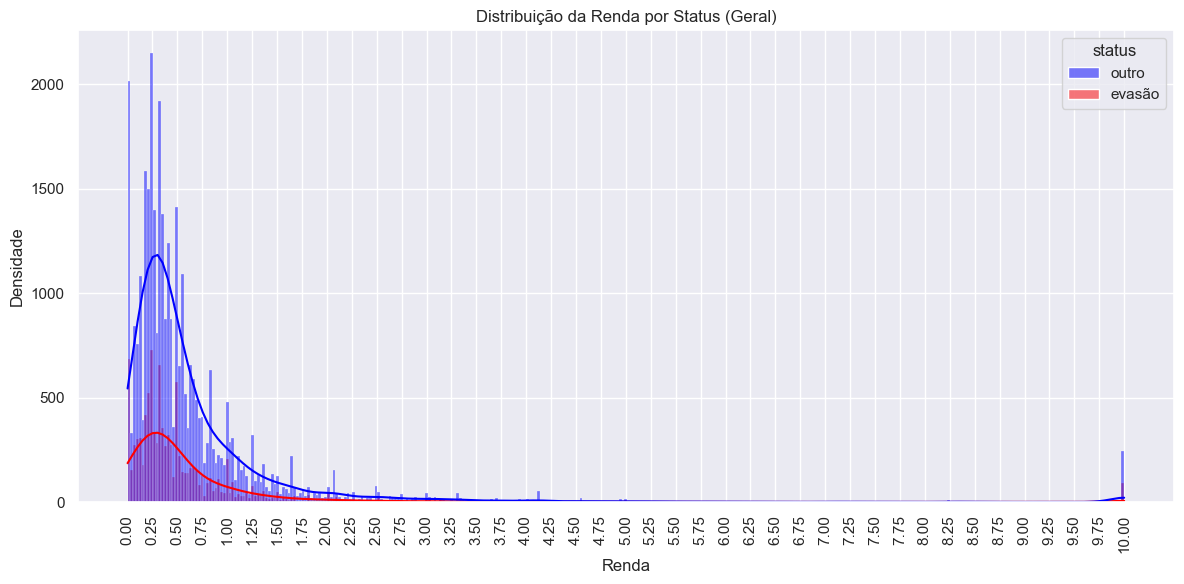

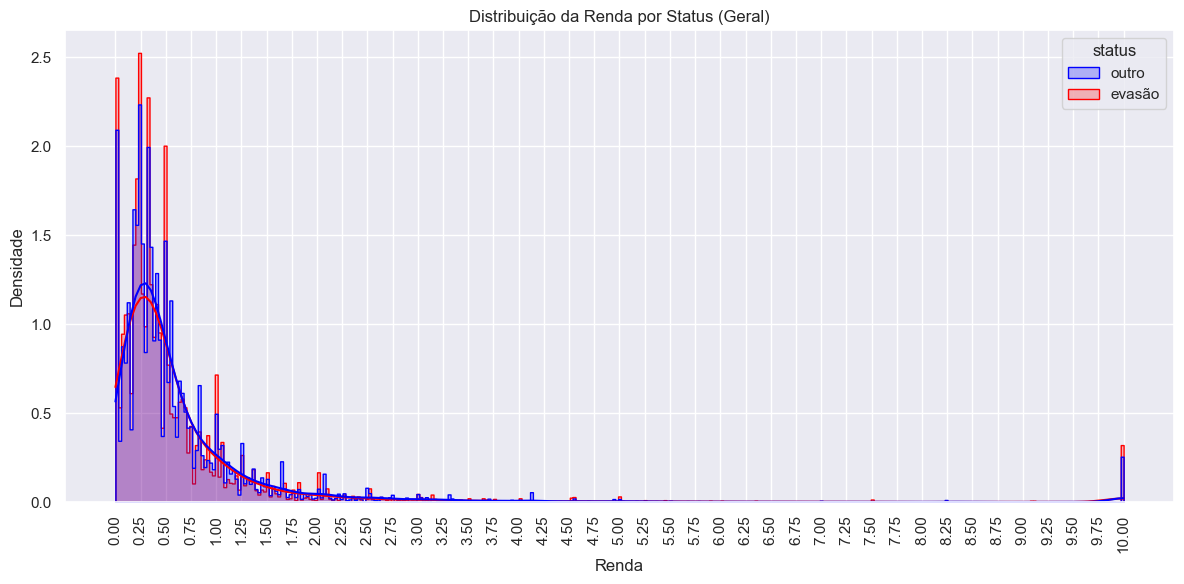

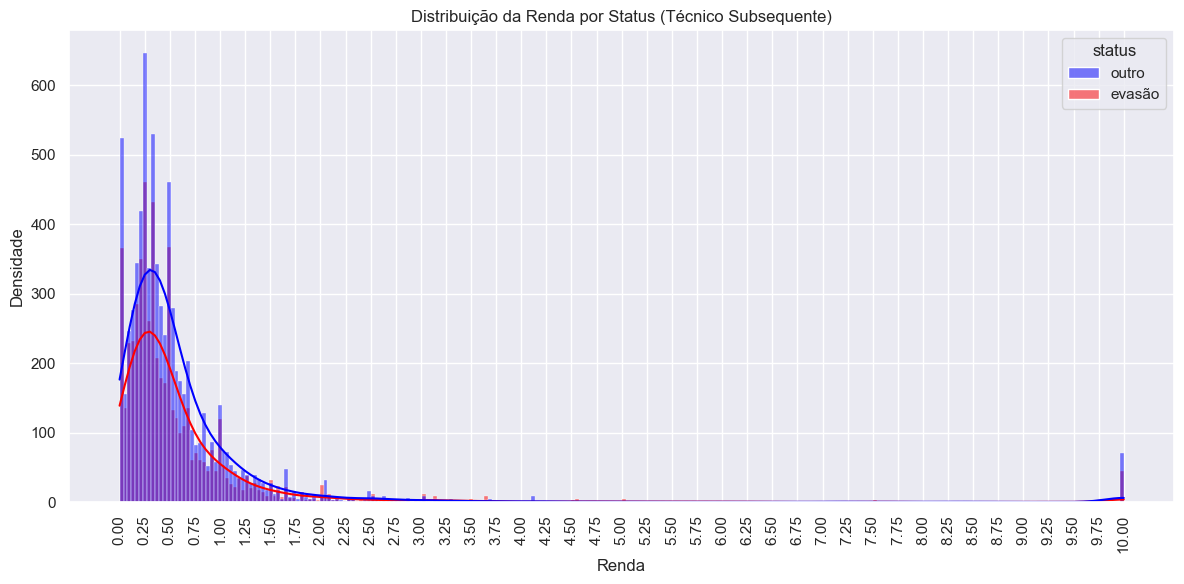

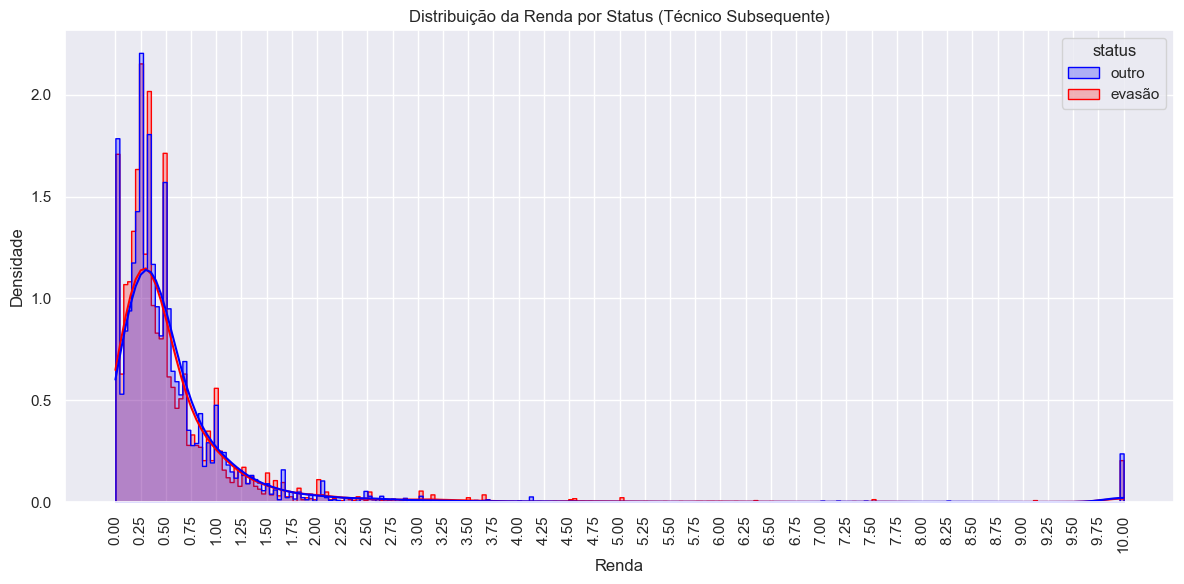

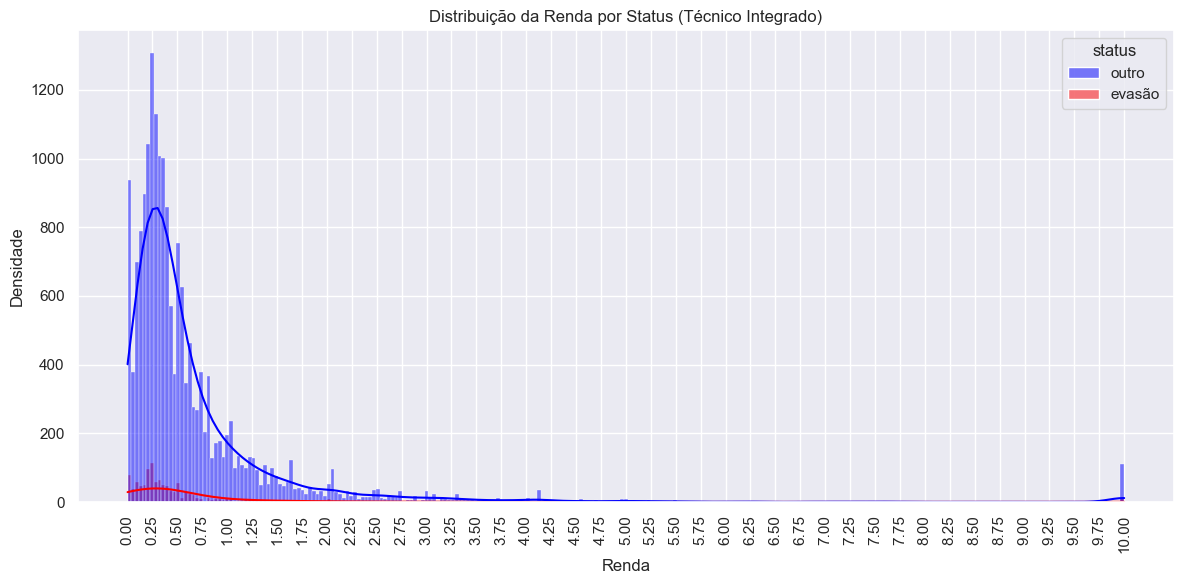

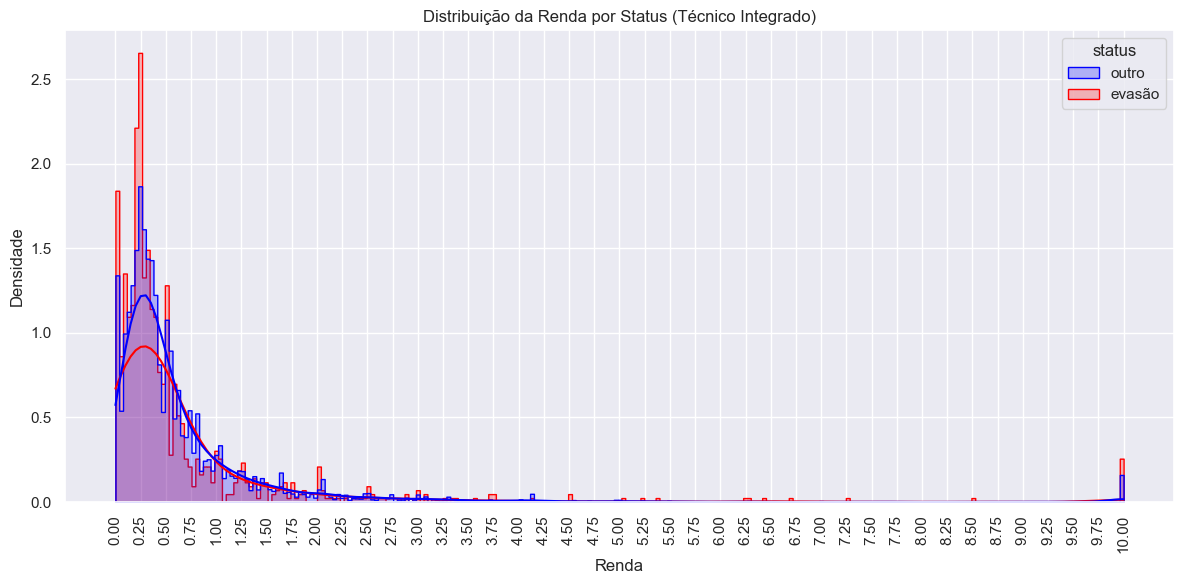

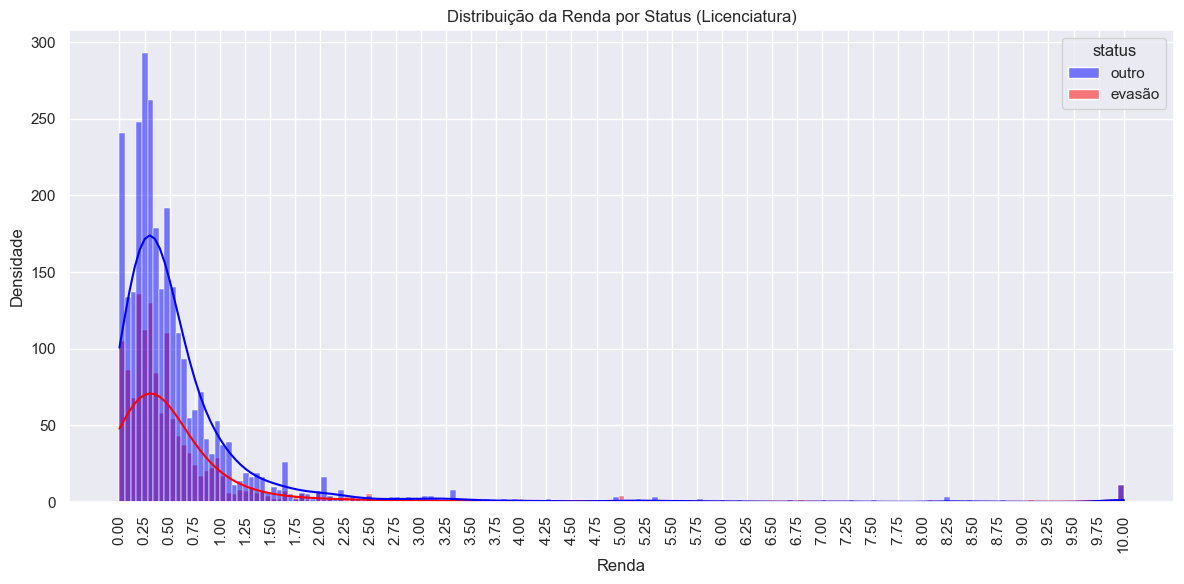

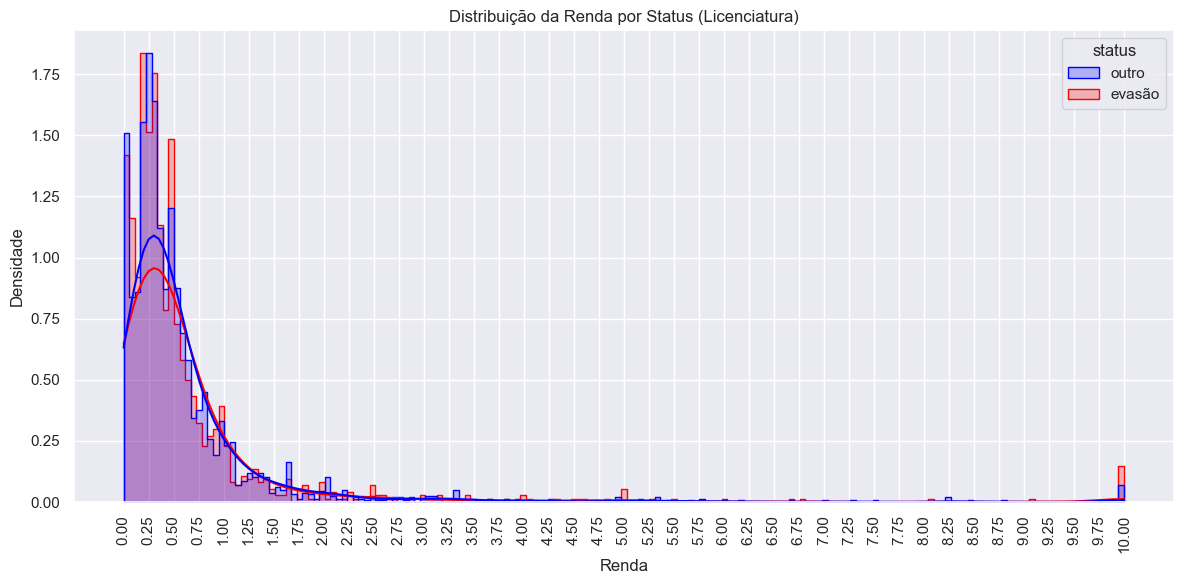

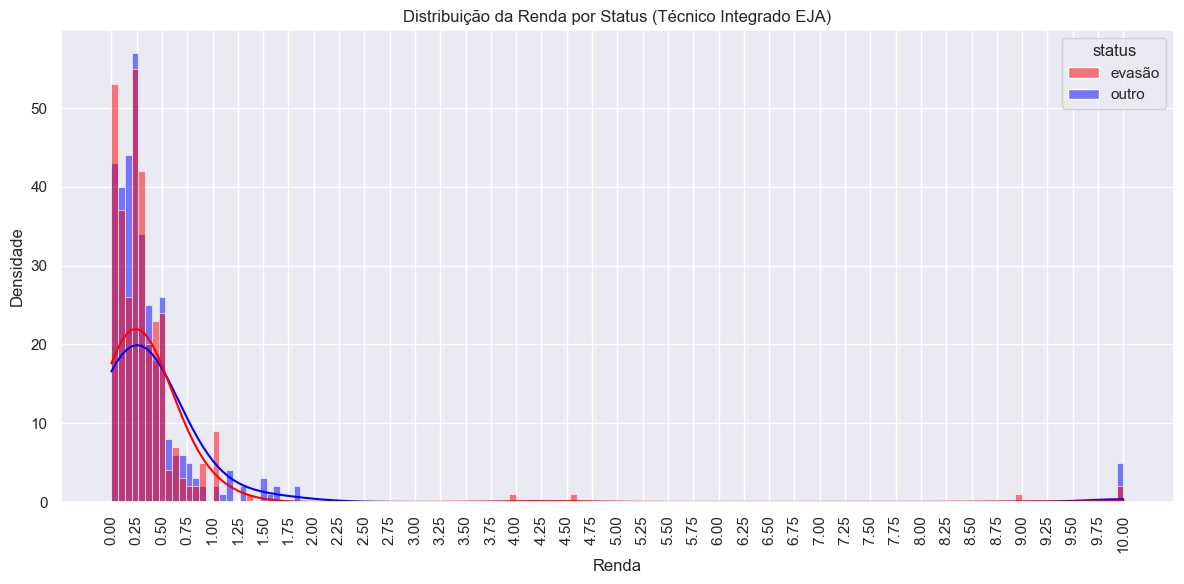

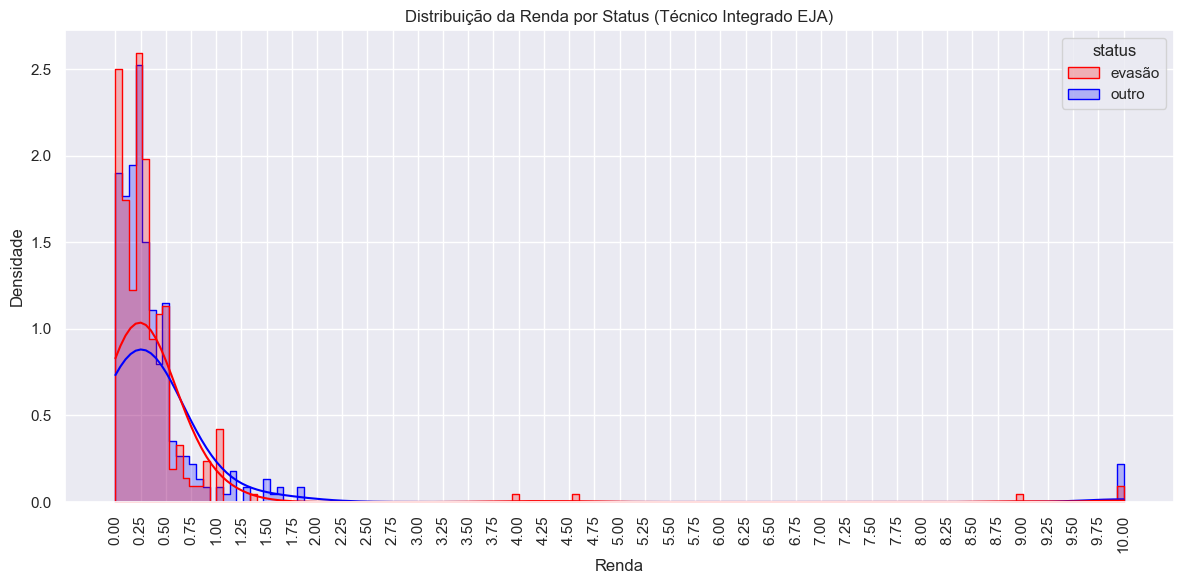

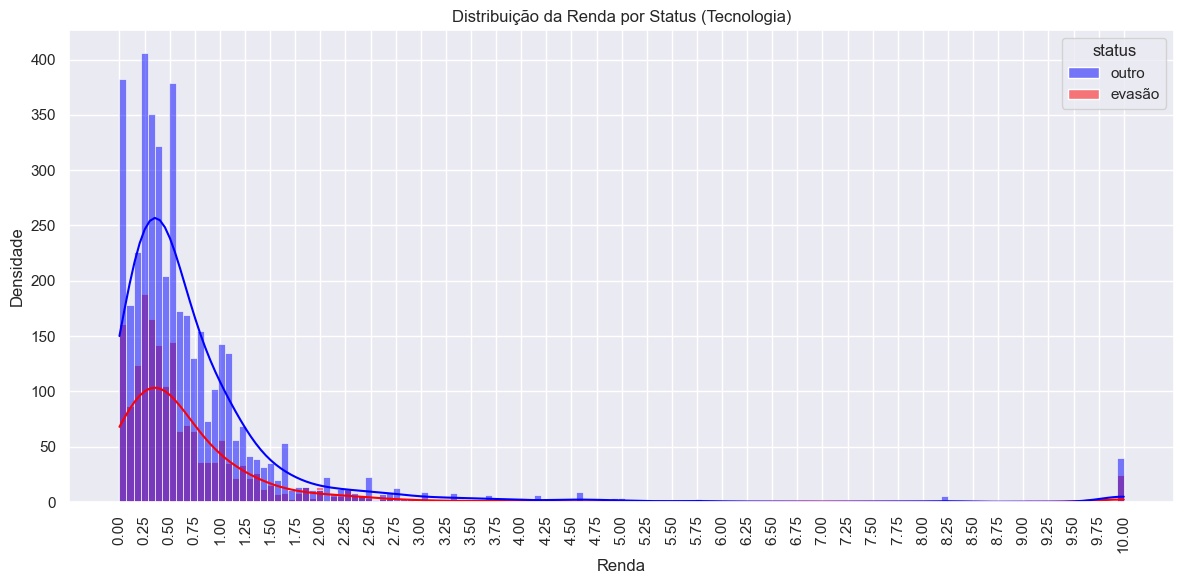

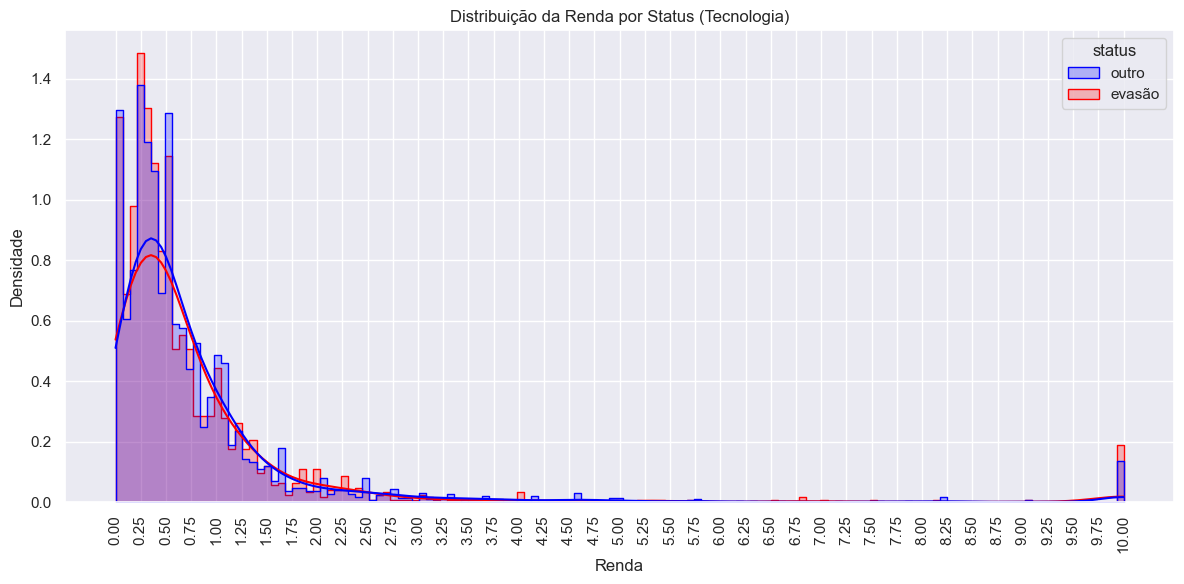

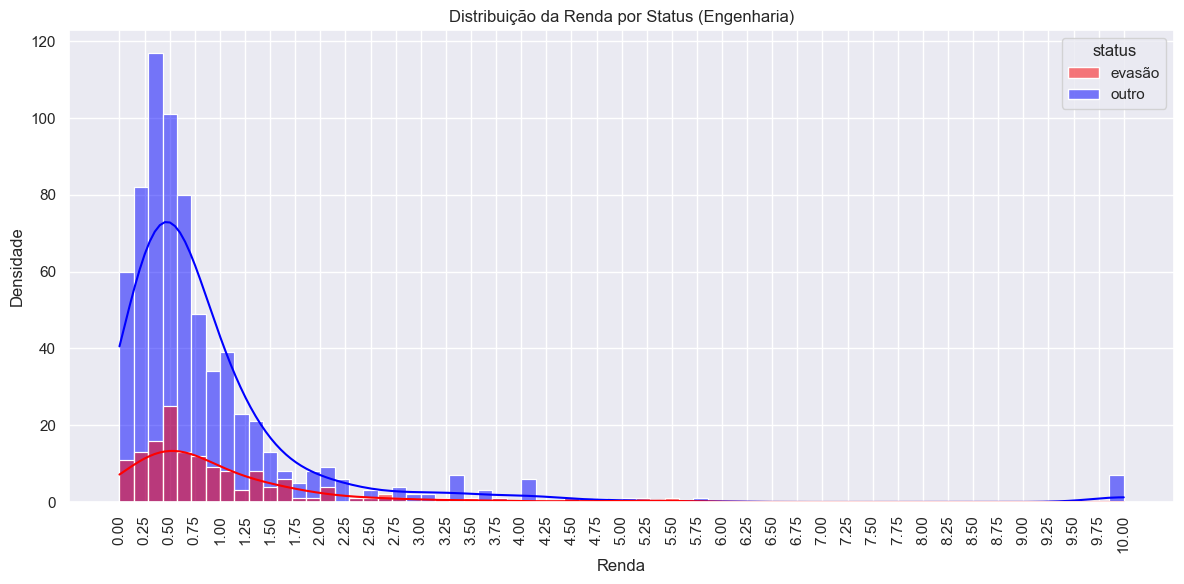

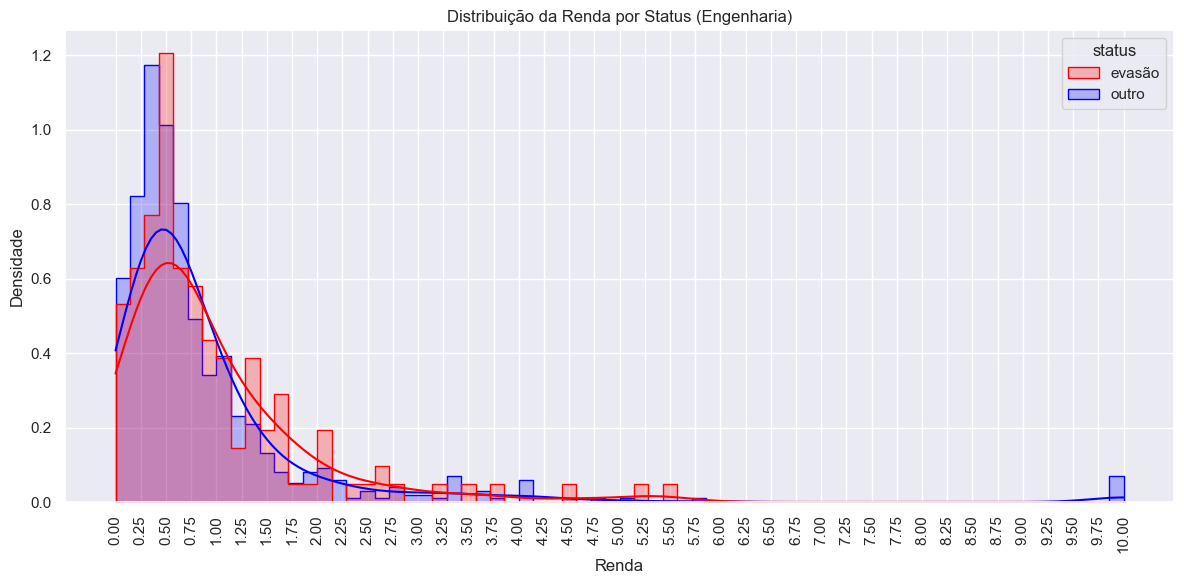

In [6]:
def plot_kde_for_modalidade(data, modalidade_value, tipo):
    """Generate a KDE plot for a given modalidade value."""

    if modalidade_value == '':
        modalidade_value = "Geral"
        filtered_data = data
    else:
        filtered_data = data[data['Modalidade'] == modalidade_value]

    # Plotting the KDE
    palette = {"evasão": "red", "outro": "blue"}
    plt.figure(figsize=(12, 6))
    if tipo == 1:
        sns.kdeplot(data=filtered_data, x="Renda Per Capita", hue="status", fill=True, palette=palette)
    elif tipo == 2:
        sns.kdeplot(data=filtered_data, x="Renda Per Capita", hue="status", multiple="fill", palette=palette, alpha=.5) #palette='coolwarm')
    elif tipo == 3:
        sns.kdeplot(
            data=filtered_data, x="Renda Per Capita", hue="status",
            cumulative=True, common_norm=False, common_grid=True,
            #palette='coolwarm'
            palette=palette, alpha=.5
        )
    elif tipo == 4:
        sns.histplot(data=filtered_data, x="Renda Per Capita", hue="status",
                     common_norm=True, kde=True, palette=palette)
    elif tipo == 5:
        sns.histplot(data=filtered_data, x="Renda Per Capita", hue="status",
                     stat="density", common_norm=True, kde=True, palette=palette)
    elif tipo == 6:
        sns.histplot(data=filtered_data, x="Renda Per Capita", hue="status",
                     element="step", stat="density", kde=True, common_norm=False,
                     palette=palette)


    # Configurar as marcas no eixo x
    x_start = 0  # ou um valor mínimo mais adequado baseado em seus dados
    x_end = filtered_data['Renda Per Capita'].max() + 0.25  # para garantir que o último valor seja incluído
    x_step = 0.25
    plt.xticks(np.arange(x_start, x_end, x_step), rotation=90)


    plt.title(f"Distribuição da Renda por Status ({modalidade_value})")
    plt.xlabel("Renda")
    plt.ylabel("Densidade")
    plt.tight_layout()
    plt.show()

plot_kde_for_modalidade(merge2018, '', 4)
plot_kde_for_modalidade(merge2018, '', 6)

# Generate the KDE plot for each unique value in 'Modalidade'
for modalidade in merge2018['Modalidade'].unique():
    #plot_kde_for_modalidade(data_selected, modalidade, 1)
    #plot_kde_for_modalidade(data_selected, modalidade, 2)
    #plot_kde_for_modalidade(data_selected, modalidade, 3)
    plot_kde_for_modalidade(merge2018, modalidade, 4)
    #plot_kde_for_modalidade(data_selected, modalidade, 5)
    plot_kde_for_modalidade(merge2018, modalidade, 6)

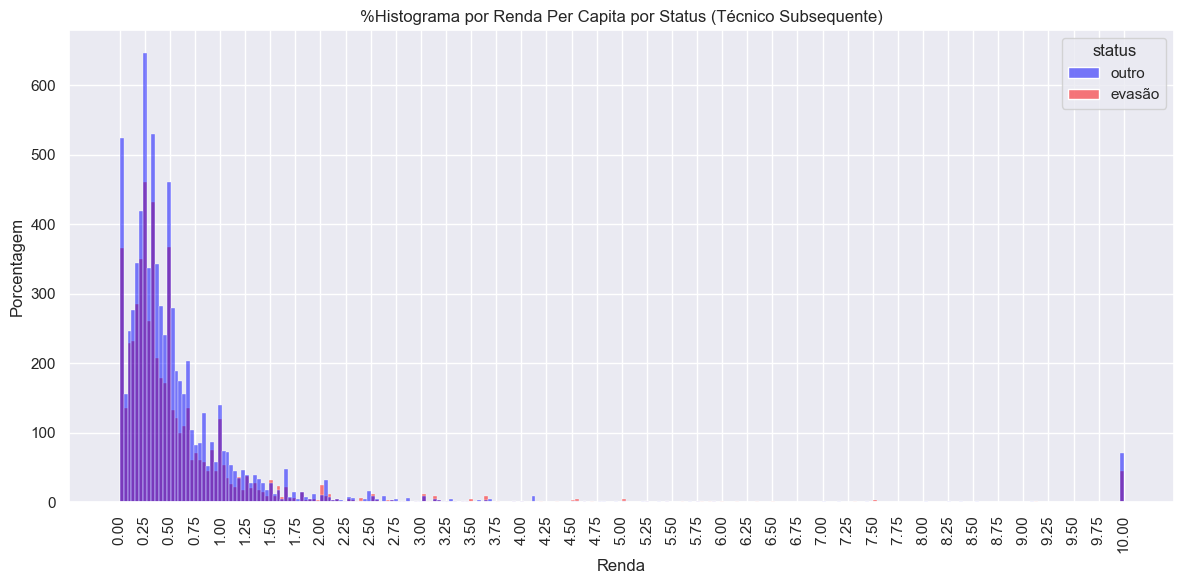

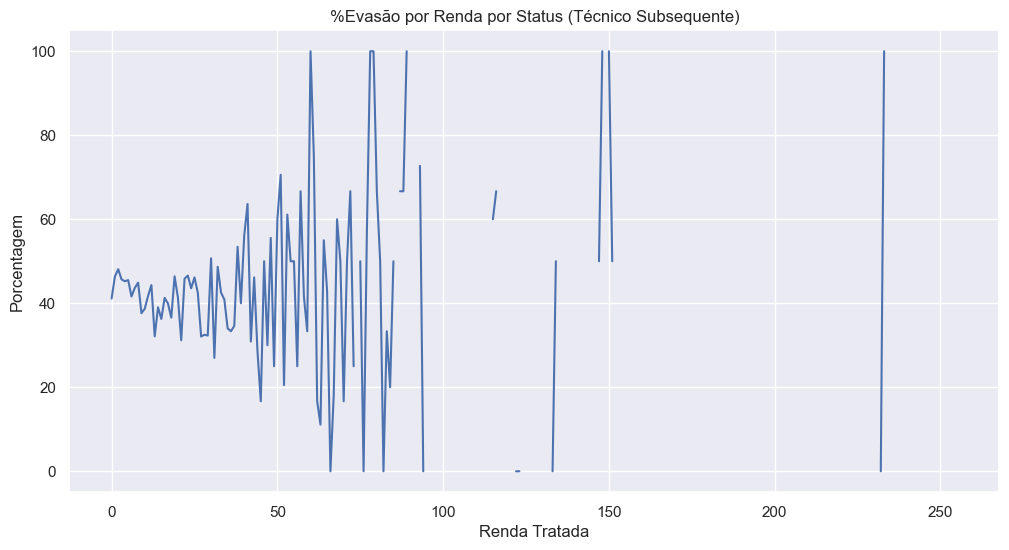

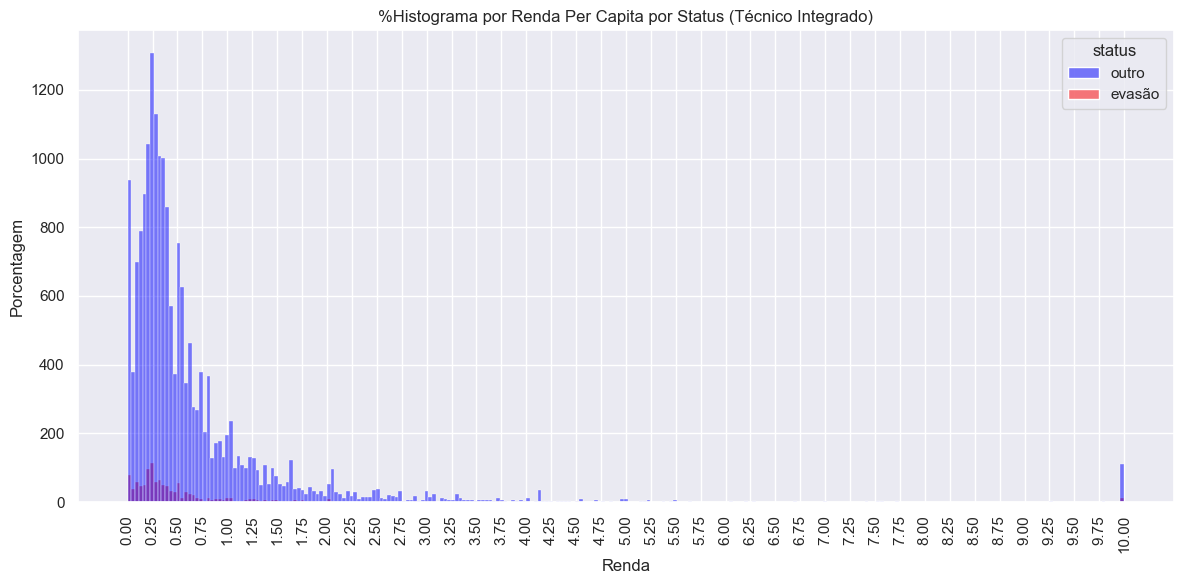

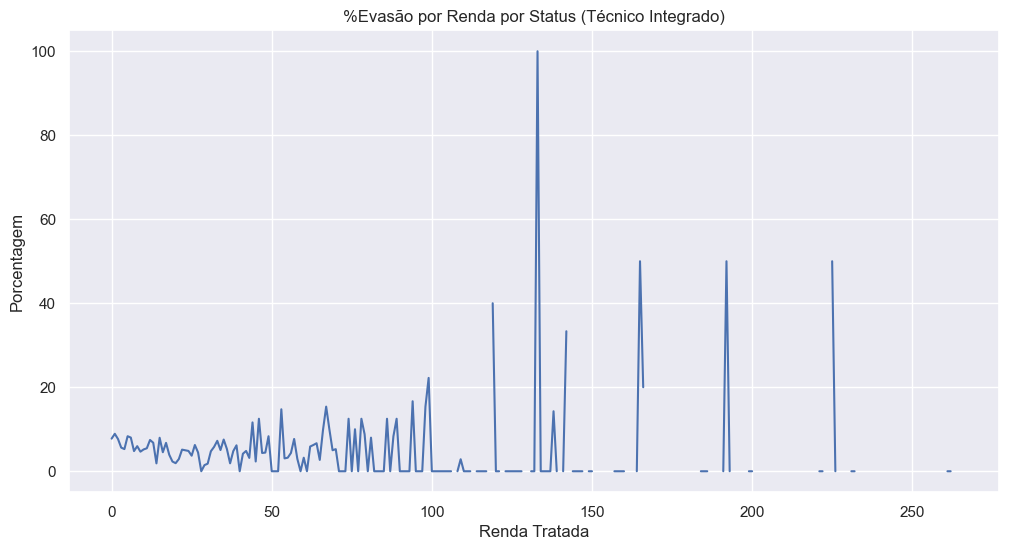

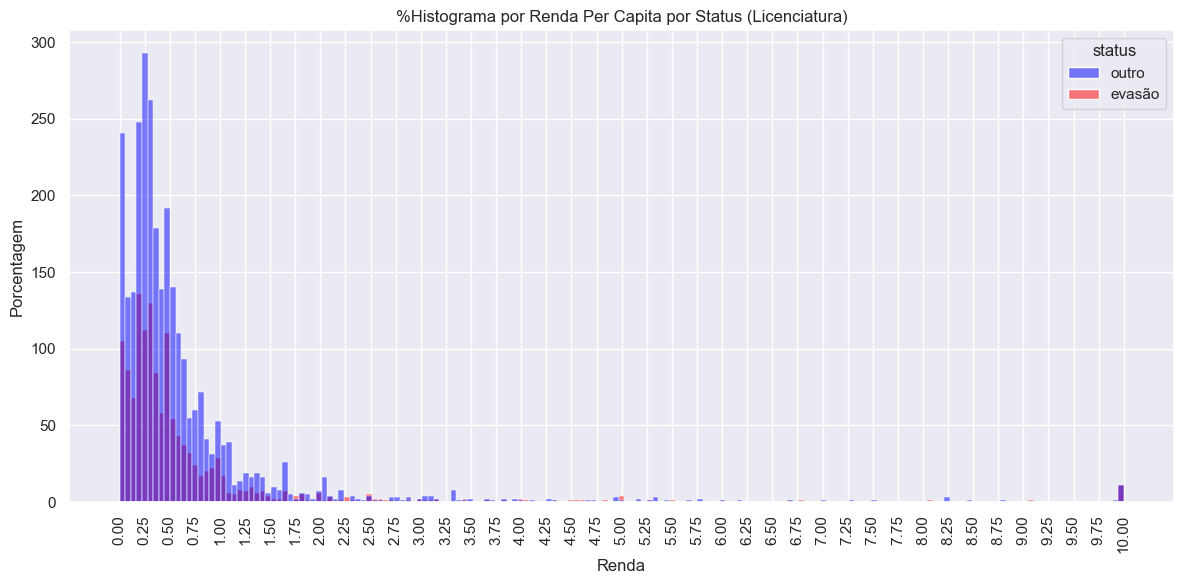

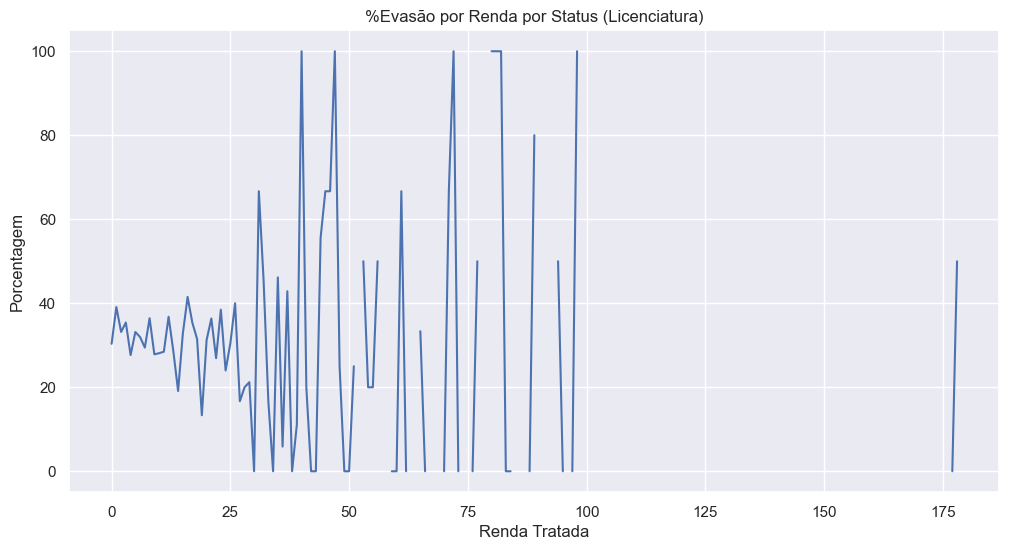

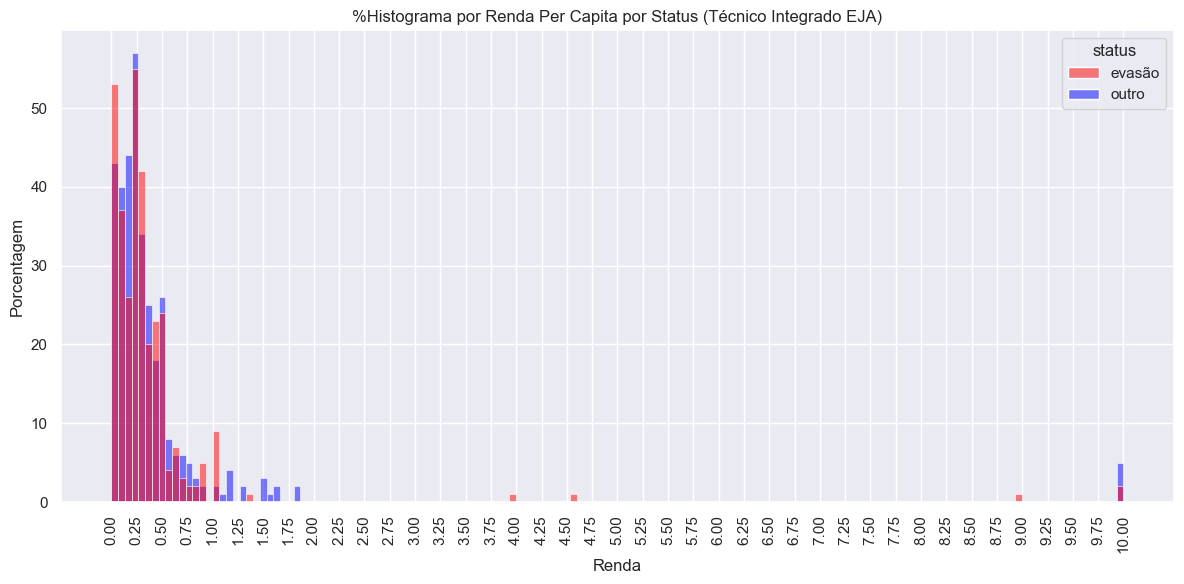

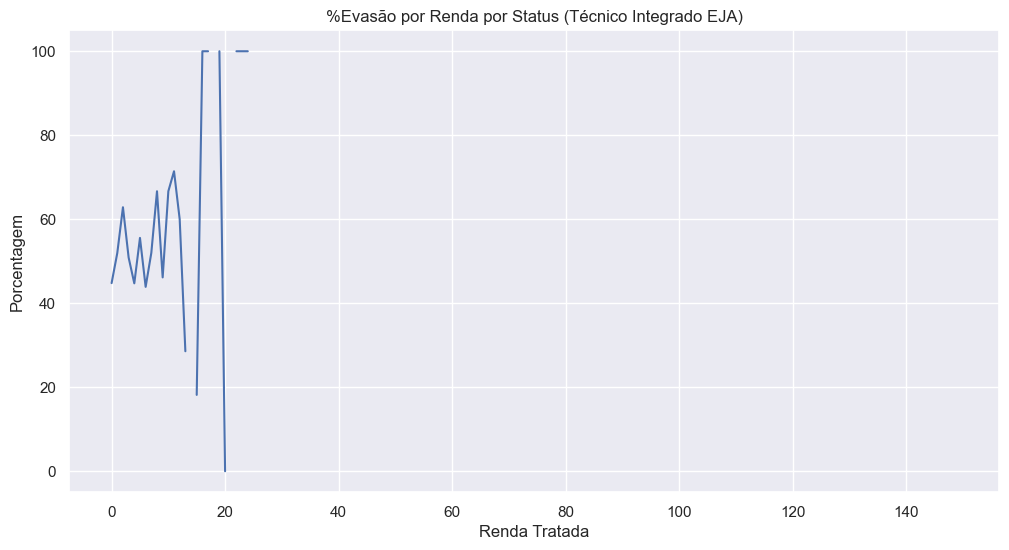

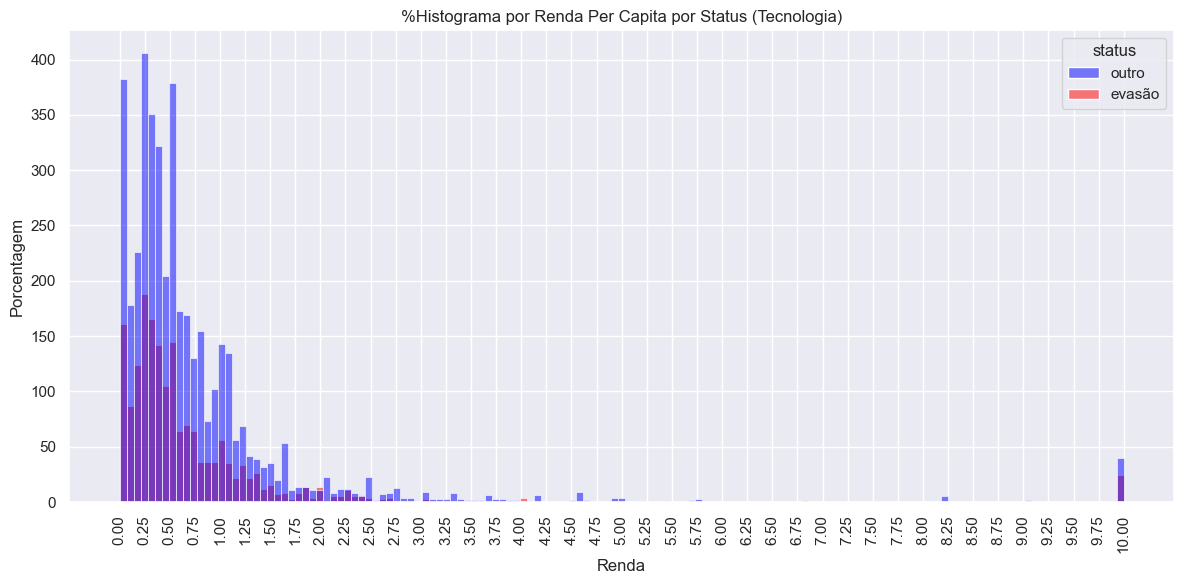

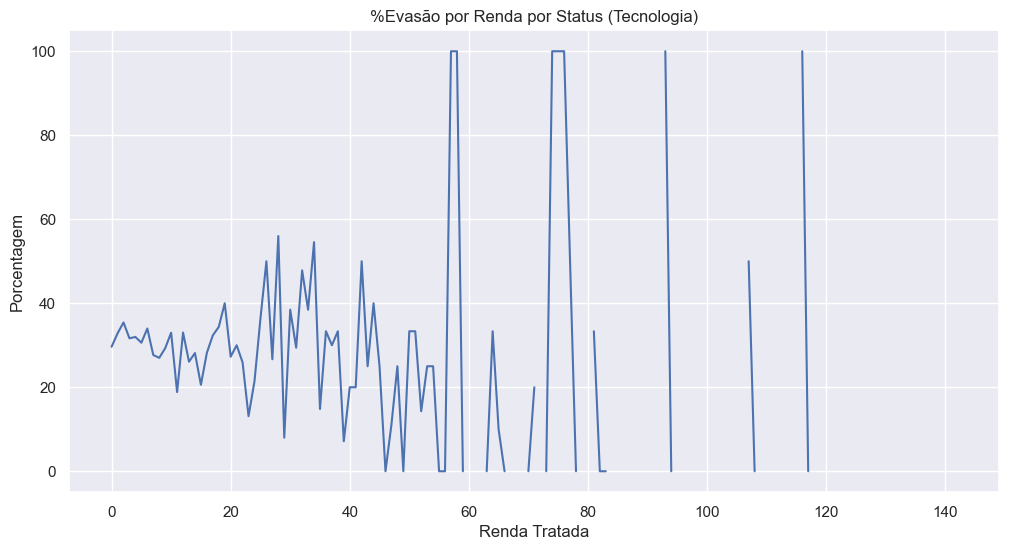

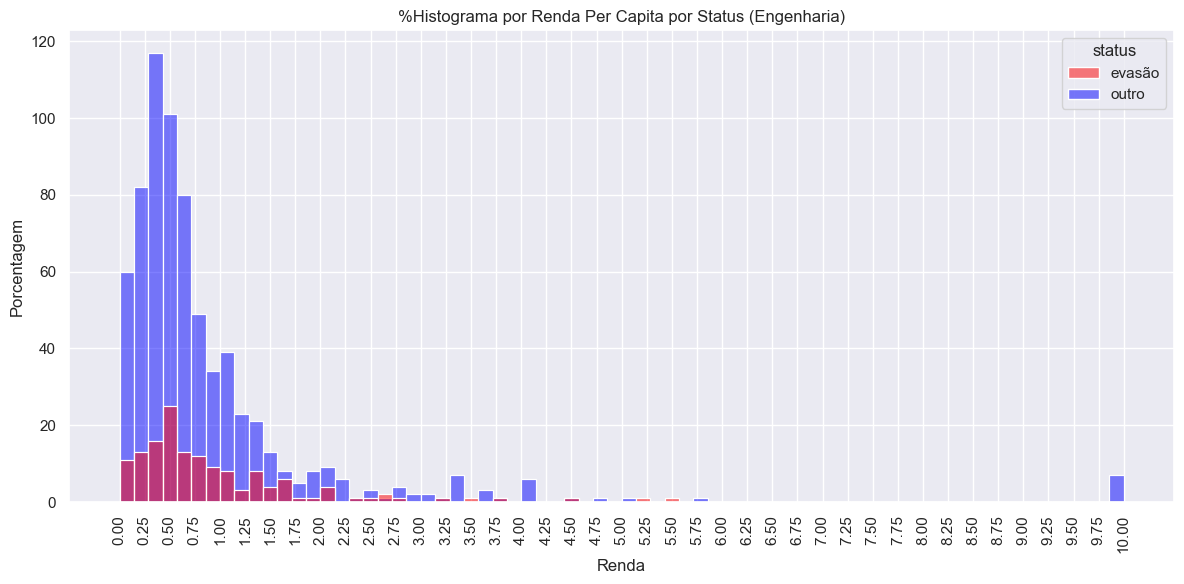

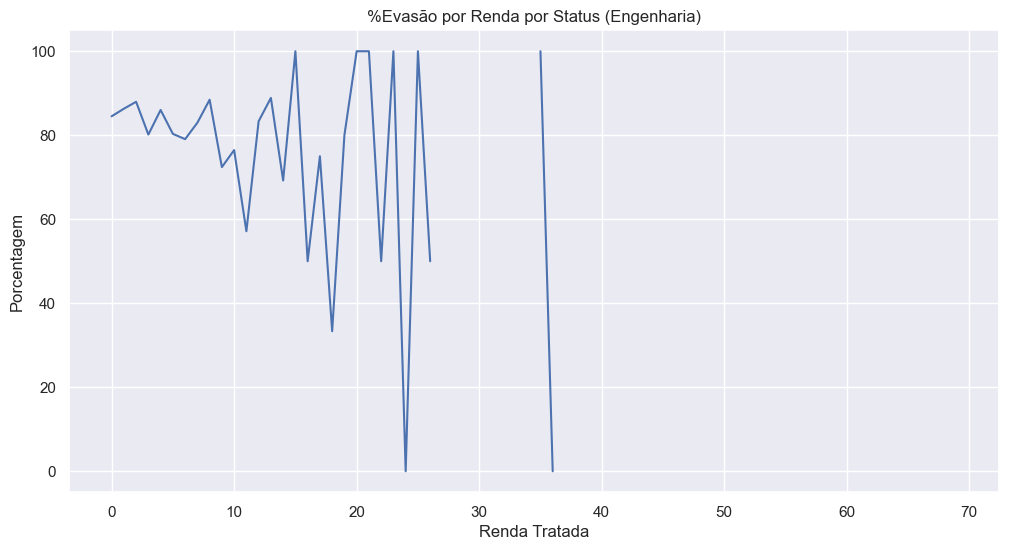

In [7]:
def plot_diff_hist_for_modalidade(data, modalidade_value):
    """Generate a KDE plot for a given modalidade value."""

    if modalidade_value == "":
        filtered_data = data
        modalidade_value = "Geral"
    else:
        filtered_data = data[data['Modalidade'] == modalidade_value]

    # Plotting the KDE
    palette = {"evasão": "red", "outro": "blue"}

    plt.figure(figsize=(12, 6))

    # Plot using Seaborn
    ax = sns.histplot(data=filtered_data, x="Renda Per Capita", hue="status", palette=palette)

    # Configurar as marcas no eixo x
    x_start = 0  # ou um valor mínimo mais adequado baseado em seus dados
    x_end = filtered_data['Renda Per Capita'].max() + 0.25  # para garantir que o último valor seja incluído
    x_step = 0.25
    plt.xticks(np.arange(x_start, x_end, x_step), rotation=90)    

    plt.title(f"%Histograma por Renda Per Capita por Status ({modalidade_value})")
    plt.xlabel("Renda")
    plt.ylabel("Porcentagem")
    plt.tight_layout()
    plt.show()

    # Get the colors used in the plot (it might be slightly different than in the palette due to normalization)
    colors = [patch.get_facecolor() for patch in ax.patches]

    # Store heights based on hue
    bar_heights = {"evasão": [], "outro": []}

    # Access bar heights
    for patch, color in zip(ax.patches, colors):
        if color == ax.get_legend().legendHandles[0].get_facecolor():
            #print(color)
            category = "outro"
        else:
            #print(color)
            category = "evasão"

        bar_heights[category].append(patch.get_height())

    #bar_heights

    # Transforming the bar_heights dictionary into a DataFrame
    bar_heights_df = pd.DataFrame(bar_heights)

    #bar_heights_df.head()

    plt.figure(figsize=(12, 6))

    percentage_evasao = ((bar_heights_df['evasão'] / bar_heights_df.sum(axis=1))*100)

    ax = percentage_evasao.plot()
    #labels = [item.get_text() for item in ax.get_xticklabels()]
    #new_labels = [str(float(label)/10) for label in labels]
    #ax.set_xticklabels(new_labels)

    ax.set_title(f"%Evasão por Renda por Status ({modalidade_value})")
    ax.set_xlabel("Renda Tratada")
    ax.set_ylabel("Porcentagem")
    #ax.tight_layout()
    plt.show()


# Generate the KDE plot for each unique value in 'Modalidade'
for modalidade in merge2018['Modalidade'].unique():
    plot_diff_hist_for_modalidade(merge2018, modalidade)

In [12]:
#merge2018.head()
merge2018[~merge2018['CONTRIBUINTES RENDA FAMILIAR'].isnull()]['CONTRIBUINTES RENDA FAMILIAR']

0                            Mãe
7                            Pai
12                           Pai
14                           Mãe
16                           Pai
                  ...           
46681                        Mãe
46683                   Pai, Mãe
46690                   Pai, Mãe
46691                   Pai, Mãe
46695    O próprio aluno, Outros
Name: CONTRIBUINTES RENDA FAMILIAR, Length: 20562, dtype: object

In [13]:
# Contar os valores únicos
value_counts = merge2018["CONTRIBUINTES RENDA FAMILIAR"].value_counts()

# Determinar a porcentagem de valores ausentes
missing_percentage = (merge2018["CONTRIBUINTES RENDA FAMILIAR"].isna().sum() / len(merge2018)) * 100

value_counts, missing_percentage


(CONTRIBUINTES RENDA FAMILIAR
 Mãe                                        5607
 Pai                                        4138
 Pai, Mãe                                   3970
 O próprio aluno                            2315
 Avô(ó)                                      654
                                            ... 
 Mãe, O próprio aluno, Avô(ó), Tio(a)          1
 Pai, Mãe, Avô(ó), Irmão(ã), Parentes          1
 O próprio aluno, Cônjuge, Não informado       1
 Mãe, Irmão(ã), Não informado                  1
 O próprio aluno, Avô(ó), Outros               1
 Name: count, Length: 119, dtype: int64,
 55.9662497858489)

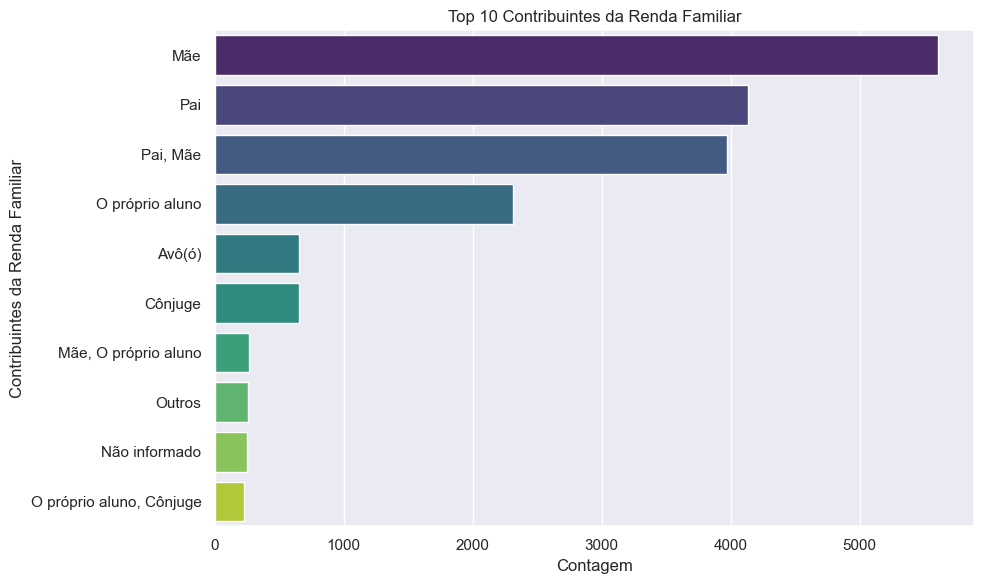

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a distribuição dos 10 valores mais frequentes
top_values = value_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_values.index, x=top_values.values, palette="viridis")
plt.xlabel('Contagem')
plt.ylabel('Contribuintes da Renda Familiar')
plt.title('Top 10 Contribuintes da Renda Familiar')
plt.tight_layout()
plt.show()


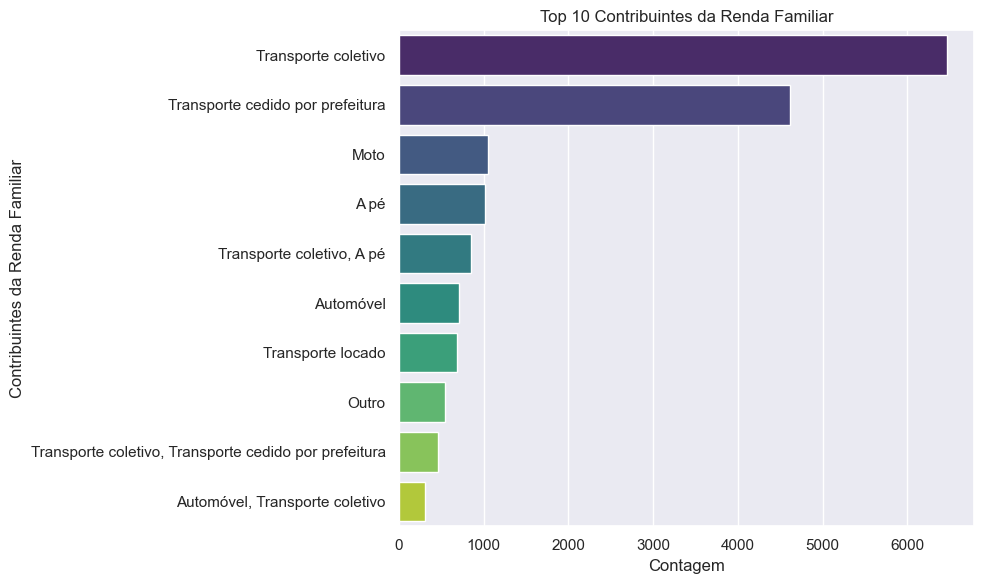

In [16]:
# Definir o atributo
attribute = 'MEIO TRANSPORTE UTILIZADO'

# Contar os valores únicos
value_counts = merge2018[attribute].value_counts()

# Visualizar a distribuição dos 10 valores mais frequentes
top_values = value_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_values.index, x=top_values.values, palette="viridis")
plt.xlabel('Contagem')
plt.ylabel('Contribuintes da Renda Familiar')
plt.title('Top 10 Contribuintes da Renda Familiar')
plt.tight_layout()
plt.show()
